<a href="https://colab.research.google.com/github/noobsterguy/assignment_ml_1/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/noobsterguy/assignment_ml_1/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Para abrir este cuaderno como el * documento interactivo * (que le permite ejecutar celdas de código usted mismo), haga clic en el icono 'Open in Colab' (funciona mejor en Chrome) o siga [este enlace](https://colab.research.google.com/github/noobsterguy/assignment_ml_1/blob/master/report.ipynb):**

>Fecha: 
>
>2020-07-25
>----  --- 

# TRABAJO ENCARGADO DEL CURSO DATA SCIENCIE Y MACHINE LEARNING

Presentado por:

Ivancovish J. Huancco


---
---
># Resumen

>El conjunto de datos presentados son para predecir si ha impactado o no por el covid de una empresa comercial.
>
>El objetivo de este análisis es resolver este problema mediante una exploración y limpieza de datos detallados tales como: Identificación de Missings, Identificación de Outliers, entre otros. Además, de el análisis de métricas del modelo.
>
>*Palabras Clave: Ausentes, Valores Atípicos, Predicción, Regresión Logistica, Métricas de Evaluación de modelos*
>
>*Keywords: Missing values, Outlier values, Prediction, Logistic Regression, Model Evaluation Metrics*

---
---

<a id='top'></a>
#### Contenido: 
#### 1. <a href='#Import'>Importar / Instalar módulos de Python (Código)</a>

#### 2. <a href='#EDA'>Exploración de Análisis de Datos</a>
21. <a href='#masafectada'>¿Que tipo de empresas pueden ser las más probables a ser afectadas?</a>
22. <a href='#queafecta'>¿Que determina si una empresa es afectada o no?</a>

#### 3. <a href='#clean'>Limpieza de Datos</a>
31. <a href='#missing'>Identificación de valores Missing</a>
32. <a href='#outlier'>Identificación de valores Outliers</a>

#### 4. <a href='#seleccion'>Selección de características</a>

#### 5. <a href='#evaluacion'>Evaluación del Modelo y Métricas</a>
51. <a href='#modelo'>Implementación del modelo en Python con scikit-learn</a>
52. <a href='#validacion'>Validación del modelo logístico</a>
53. <a href='#cruzada'>Validacion cruzada-k fold "Cross-Validation"</a>
54. <a href='#roc'>Curva de características operativas del receptor (ROC)</a>

#### 6. <a href='#ML'>Pruebas con modelos de regresión</a>

#### 7. <a href='#conclusion'>Conclusion</a>

<a id='import'></a>
#### 1. Importar / instalar módulos de Python (código)


Primero descargamos archivos específicos para este análisis (datos experimentales, etc.):



In [ ]:
%%shell
git clone https://github.com/noobsterguy/assignment_ml_1.git

Cloning into 'assignment_ml_1'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


Finalmente, importamos todos los módulos de Python necesarios:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sb
import pandas as pd
import os
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Comience con la importacion de datos para trabajar.

In [ ]:
# El error de código utf-8 generalmente aparece cuando el rango de valores numéricos excede de 0 a 127. Entonces, los puntos ISO-8859-1 Unicode 0–255 son idénticos a los valores latinos 1, por lo que la conversión a esta codificación simplemente requiere convertir los puntos de código en valores de bytes; Si se encuentra un punto de código mayor que 255, la cadena no se puede codificar en Latin-1
data = pd.read_csv('assignment_ml_1/Data_cov.csv',encoding='ISO-8859-1',sep=";")
data

,Sector,Dep,Impactado,Saldo,Desembolso_mes,Saldo Promedio,"Deuda Sistea,",Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
0,INDUSTRIA,Lima,0,56643.10092,0.0,28321.550460,31365.73,5876.82,0,3,108400.0,43741.08,5876.820,-800.65,-0.024891,830.82,0.164649,830.82,0.164649
1,COMERCIO,Arequipa,0,190313.99460,0.0,63437.998180,64864.99,4467.40,0,4,105300.0,69737.17,4467.400,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896
2,SERVICIO,Amazonas,0,547601.57360,0.0,182533.857900,200239.32,5000.92,0,1,86600.0,79178.83,5000.920,653.68,0.003275,2000.92,0.666973,2000.92,0.666973
3,INDUSTRIA,Lima,0,283914.20840,0.0,94638.069470,112945.17,325.50,0,3,103000.0,0.00,325.500,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351
4,COMERCIO,Cusco,0,142296.43840,0.0,47432.146120,144877.21,0.00,0,4,172920.0,171999.33,0.000,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,COMERCIO,Lambayeque,1,4325.85076,0.0,1441.950253,1624.47,2558.31,0,4,30000.0,4905.00,2528.565,-710.56,-0.304304,-3174.29,-0.550924,-2548.50,-0.543144
1994,COMERCIO,Arequipa,1,94650.62631,0.0,31550.208770,75502.84,3029.48,0,4,32100.0,7034.00,3029.480,-5421.28,-0.066992,-10965.03,-0.783524,-10965.03,-0.783524
1995,COMERCIO,Lima,1,747579.33510,0.0,249193.111700,843972.49,593.99,0,3,180905.0,93482.00,593.990,6776.19,0.008094,-11589.60,-0.951247,-11589.60,-0.951247
1996,COMERCIO,Lima,1,18077.98187,0.0,6025.993957,122633.10,5312.64,0,3,69500.0,8333.00,5312.640,-3838.01,-0.030347,-18929.55,-0.780851,-18929.55,-0.780851


Primero, por comodidad y posibles futuros conflictos cambiare los nombres de las columnas

In [ ]:
data.columns


Index(['Sector', 'Dep', 'Impactado', 'Saldo', 'Desembolso_mes',
       'Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Turismo',
       'Sector de Impacto', 'Venta ', 'Venta Formal', 'Pasivo_desembolso',
       'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va',
       'pasivo rezagada vr', 'Pasivo_desembolso da', 'Pasivo_desembolso dr'],
      dtype='object')

In [ ]:
data = data.rename(columns={'Saldo Promedio':'Saldo_Promedio',
                                   'Deuda Sistea,':'Deuda_Sistema','Sector de Impacto':'Sector_de_Impacto','Venta ':'Venta','Venta Formal':'Venta_Formal','Deuda rezagada va':'Deuda_rezagada_va'
                                   ,'Deuda rezagada vr':'Deuda_rezagada_vr','pasivo rezagada va':'pasivo_rezagada_va','pasivo rezagada vr':'pasivo_rezagada_vr'
                                   ,'Pasivo_desembolso da':'Pasivo_desembolso_da','Pasivo_desembolso dr':'Pasivo_desembolso dr'})
data

,Sector,Dep,Impactado,Saldo,Desembolso_mes,Saldo_Promedio,Deuda_Sistema,Pasivo,Turismo,Sector_de_Impacto,Venta,Venta_Formal,Pasivo_desembolso,Deuda_rezagada_va,Deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,Pasivo_desembolso_da,Pasivo_desembolso dr
0,INDUSTRIA,Lima,0,56643.10092,0.0,28321.550460,31365.73,5876.82,0,3,108400.0,43741.08,5876.820,-800.65,-0.024891,830.82,0.164649,830.82,0.164649
1,COMERCIO,Arequipa,0,190313.99460,0.0,63437.998180,64864.99,4467.40,0,4,105300.0,69737.17,4467.400,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896
2,SERVICIO,Amazonas,0,547601.57360,0.0,182533.857900,200239.32,5000.92,0,1,86600.0,79178.83,5000.920,653.68,0.003275,2000.92,0.666973,2000.92,0.666973
3,INDUSTRIA,Lima,0,283914.20840,0.0,94638.069470,112945.17,325.50,0,3,103000.0,0.00,325.500,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351
4,COMERCIO,Cusco,0,142296.43840,0.0,47432.146120,144877.21,0.00,0,4,172920.0,171999.33,0.000,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,COMERCIO,Lambayeque,1,4325.85076,0.0,1441.950253,1624.47,2558.31,0,4,30000.0,4905.00,2528.565,-710.56,-0.304304,-3174.29,-0.550924,-2548.50,-0.543144
1994,COMERCIO,Arequipa,1,94650.62631,0.0,31550.208770,75502.84,3029.48,0,4,32100.0,7034.00,3029.480,-5421.28,-0.066992,-10965.03,-0.783524,-10965.03,-0.783524
1995,COMERCIO,Lima,1,747579.33510,0.0,249193.111700,843972.49,593.99,0,3,180905.0,93482.00,593.990,6776.19,0.008094,-11589.60,-0.951247,-11589.60,-0.951247
1996,COMERCIO,Lima,1,18077.98187,0.0,6025.993957,122633.10,5312.64,0,3,69500.0,8333.00,5312.640,-3838.01,-0.030347,-18929.55,-0.780851,-18929.55,-0.780851


<a id='EDA'></a>
#### 2. Exploración y Análisis de Datos


En esta sección, estableceremos las variables independientes que brinden mayor información para nuestro analisis.

<a id='masafecta'></a>
##### 2.2. ¿Que tipo de empresas pueden ser las más probables a ser afectadas?

Según un informe realizado por el [IPE](https://www.ipe.org.pe/portal/wp-content/uploads/2020/05/INFORME-IPE-7.pdf) menciona que ciertos sectores de la economía son más afectados que otros. Además, Las empresas no pueden equilibrar sus ingresos con respecto a sus deudas.

Esto conlleva a utilizar al sector como una variable, puesto que, si una empresa pertenece a cierto serctor, sera mas propenso a ser impactada.

Asi, podemos apreciar cuales son la subvariables (sectores).

Tambien se podria analizar con respecto a la ubicación (ciudad) de la empresa



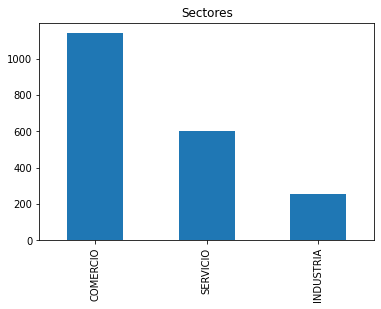

In [ ]:
data["Sector"].unique()
plot = data['Sector'].value_counts().plot(kind='bar',
                                            title='Sectores')

<a id='masafecta'></a>
##### 2.3. ¿Que determina si un cliente es impactado o no? 

Podrian existir distintos factores que hacen que el cliente sea impactado tales como: el sector a la que la empresa pertenece, lugar, entre otros por ejemplo, para empresa de Cine, que pertenece al sector terciario de servicios, será afectada considerablemente en su economía debido a ser un lugar propenso para el congatio lo que conllevaria tener venta 0 y una deuda considerable, un cliente consumidor de este servicio puede ser verse afectado.

Por otro lado, el turismo tambien puede llegar a afectar sectores como el comercio en cada región del pais. tal como indica el grafico mostrado arriba.

En resumen, cada variable mostrada en los datos contribuye de alguna manera para realizar un análisis estadistico.

<a id='clean'></a>
#### 3. Limpieza de Datos

<a id='missing'></a>
##### 3.1. Identificación de valores Missing


A continuación, iniciamos con el análisis de valores Ausentes (Missing) con el metodo ".matrix", ".bar" y "isnull".

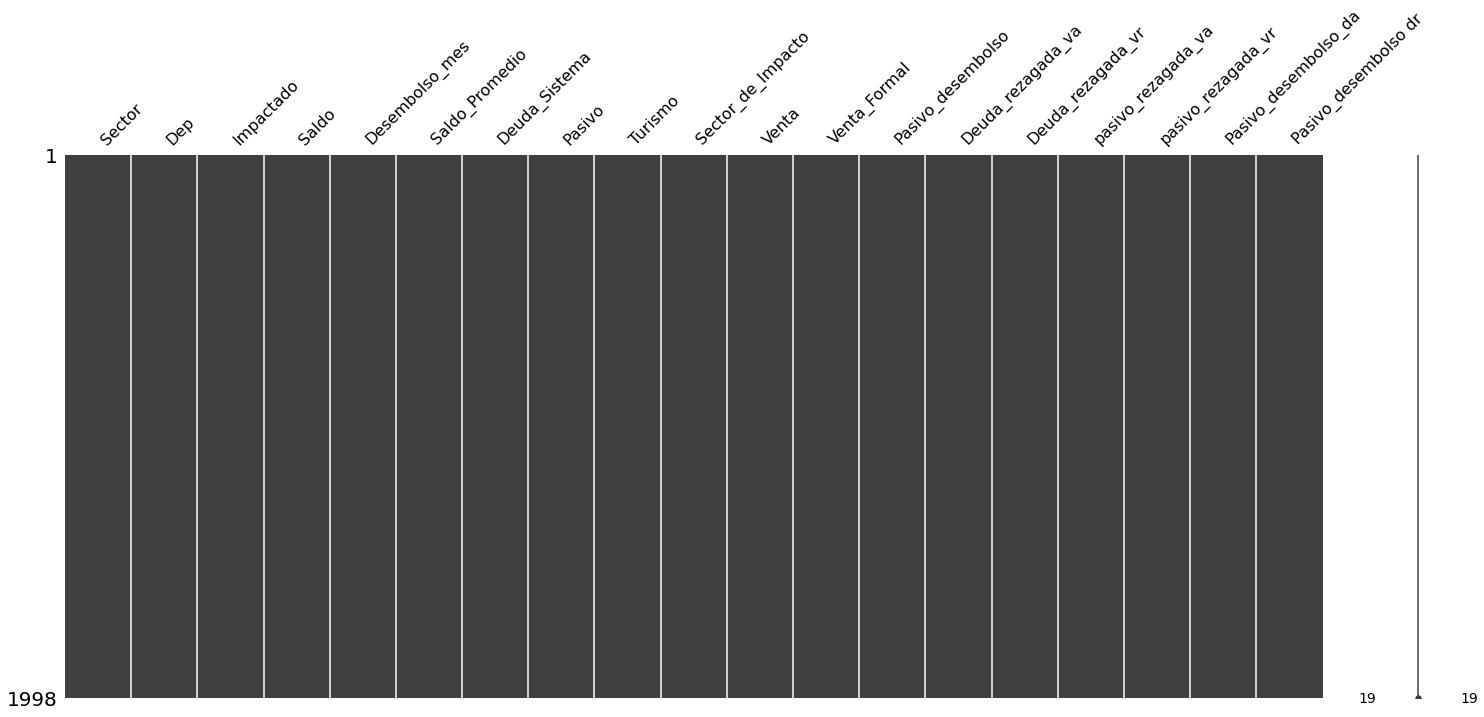

In [ ]:
msno.matrix(data)

Ahora con el método ".bar"

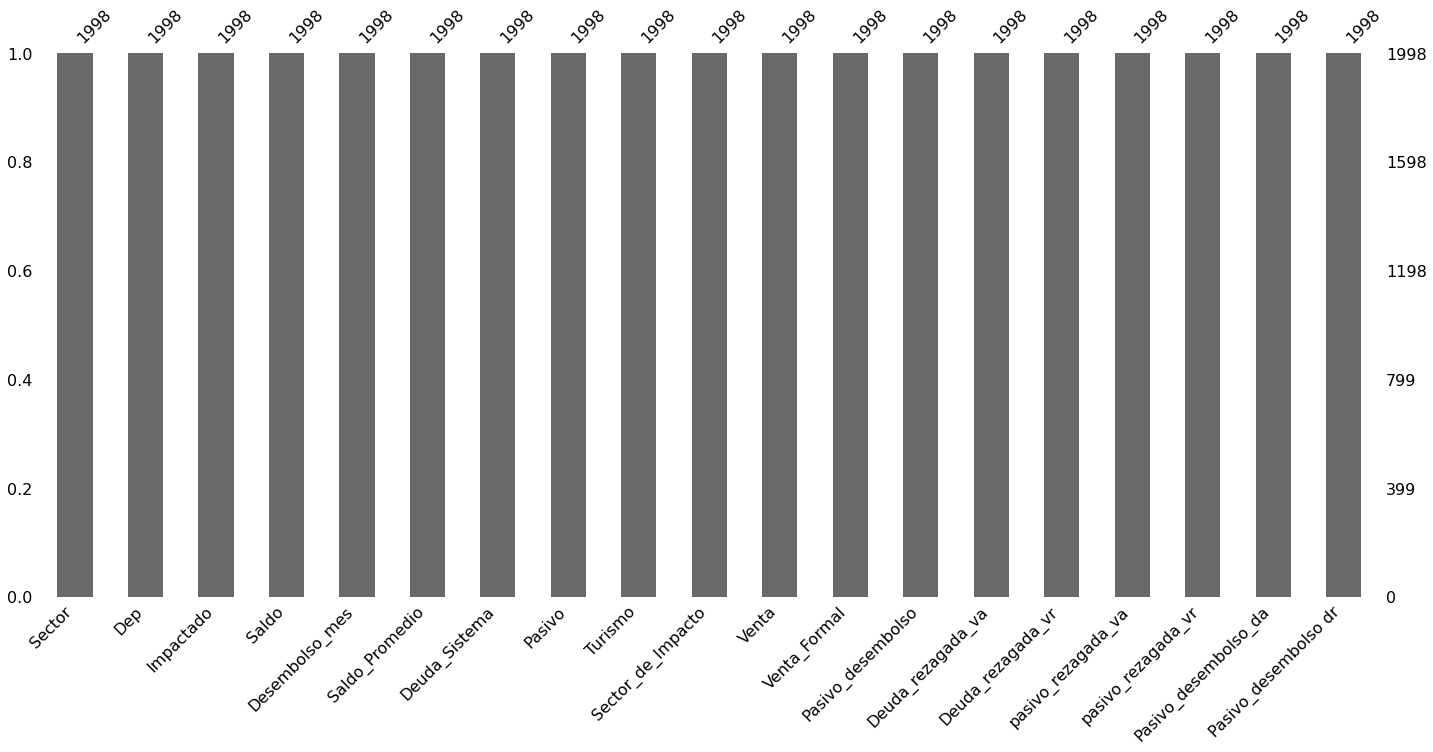

In [ ]:
msno.bar(data)

NÚmero de missing por columnas



In [ ]:
data.isnull().sum()

Sector                  0
Dep                     0
Impactado               0
Saldo                   0
Desembolso_mes          0
Saldo_Promedio          0
Deuda_Sistema           0
Pasivo                  0
Turismo                 0
Sector_de_Impacto       0
Venta                   0
Venta_Formal            0
Pasivo_desembolso       0
Deuda_rezagada_va       0
Deuda_rezagada_vr       0
pasivo_rezagada_va      0
pasivo_rezagada_vr      0
Pasivo_desembolso_da    0
Pasivo_desembolso dr    0
dtype: int64

*   Como se puede apreciar de ambos graficos generados mediante ".matrix" y ".bar", se observa que el Conjunto de Datos (DataSet) no contiene valores Ausentes (Missing)

Ahora verificamos el tipo de dato de cada columna

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sector                1998 non-null   object 
 1   Dep                   1998 non-null   object 
 2   Impactado             1998 non-null   int64  
 3   Saldo                 1998 non-null   float64
 4   Desembolso_mes        1998 non-null   float64
 5   Saldo_Promedio        1998 non-null   float64
 6   Deuda_Sistema         1998 non-null   float64
 7   Pasivo                1998 non-null   float64
 8   Turismo               1998 non-null   int64  
 9   Sector_de_Impacto     1998 non-null   int64  
 10  Venta                 1998 non-null   float64
 11  Venta_Formal          1998 non-null   float64
 12  Pasivo_desembolso     1998 non-null   float64
 13  Deuda_rezagada_va     1998 non-null   float64
 14  Deuda_rezagada_vr     1998 non-null   float64
 15  pasivo_rezagada_va   

Aqui la unica variable que no corresponde es Turismo puesto que este deberia sea de tipo categorico.

<a id='outlier'></a>
##### 3.2. Identificación de valores Outliers

Como se mencionó anteriormente, los factores que intervienen para que una empresa sea afectada son, sus ventas, deudas y pasivos.

Así se puede hacer un filtro de variables para inspeccionar valores atípicos.

In [ ]:
data["Saldo"]

0        56643.10092
1       190313.99460
2       547601.57360
3       283914.20840
4       142296.43840
            ...     
1993      4325.85076
1994     94650.62631
1995    747579.33510
1996     18077.98187
1997    286471.03470
Name: Saldo, Length: 1998, dtype: float64

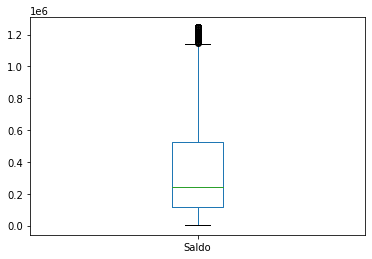

In [ ]:
data.Saldo.plot.box() 

A partir del gráfico mostrado en la parte superior, se tiene que existen datos atípicos que podrian afectar en nuestro estudio.

In [ ]:
cotas_saldo=np.percentile(data[-data.Saldo.isnull()]['Saldo'],[1,90])
cotas_saldo

array([   4226.8974471, 1245148.794177 ])

In [ ]:
data.loc[data.Saldo>=cotas_saldo[1],'Saldo']=cotas_saldo[1]
data.loc[data.Saldo<=cotas_saldo[0],'Saldo']=cotas_saldo[0]
[np.min(data.Saldo),np.max(data.Saldo)]

[4226.897447096341, 1245148.794177]

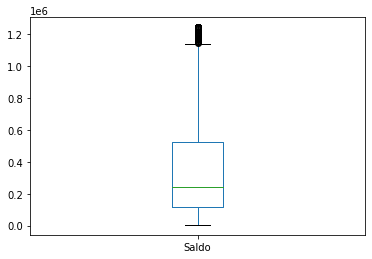

In [ ]:
data.Saldo.plot.box() #grid='True'

Mismo procedimiento para Ventas

In [ ]:
data["Venta"]

0       108400.0
1       105300.0
2        86600.0
3       103000.0
4       172920.0
          ...   
1993     30000.0
1994     32100.0
1995    180905.0
1996     69500.0
1997     50514.0
Name: Venta, Length: 1998, dtype: float64

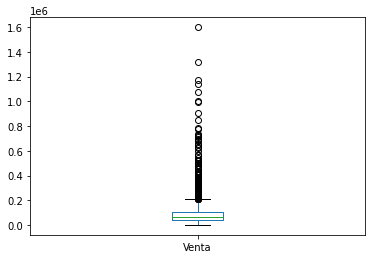

In [ ]:
data.Venta.plot.box() 

In [ ]:
cotas_venta=np.percentile(data[-data.Venta.isnull()]['Venta'],[1,90])
cotas_venta

array([  8438.8  , 197429.904])

In [ ]:
data.loc[data.Venta>=cotas_venta[1],'Venta']=cotas_venta[1]
data.loc[data.Venta<=cotas_venta[0],'Venta']=cotas_venta[0]
[np.min(data.Venta),np.max(data.Venta)]

[8438.8, 197429.90399999998]

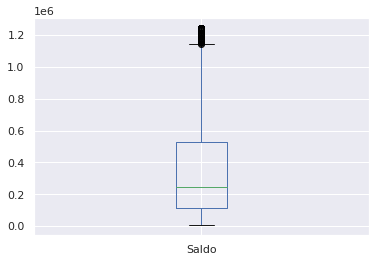

In [ ]:
data.Saldo.plot.box() #grid='True'

<a id='seleccion'></a>
#### 4. Selección de características

La variable turismo podria ser tambien contribuyente asi que lo separamor por dummies

In [ ]:
dummy_sector = pd.get_dummies(data["Sector"], prefix="sec")
dummy_departamento = pd.get_dummies(data["Dep"], prefix="dep")
dummy_turismo = pd.get_dummies(data["Turismo"], prefix="turis")
dummy_departamento

,dep_Amazonas,dep_Apurímac,dep_Arequipa,dep_Ayacucho,dep_Cajamarca,dep_Callao,dep_Cusco,dep_Huancavelica,dep_Huánuco,dep_Ica,dep_Junín,dep_La Libertad,dep_Lambayeque,dep_Lima,dep_Loreto,dep_Madre de Dios,dep_Moquegua,dep_Pasco,dep_Piura,dep_Puno,dep_San Martín,dep_Tacna,dep_Tumbes,dep_Ucayali,dep_Áncash
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=pd.concat([data,dummy_sector,dummy_turismo,dummy_departamento],axis=1)
data

,Sector,Dep,Impactado,Saldo,Desembolso_mes,Saldo_Promedio,Deuda_Sistema,Pasivo,Turismo,Sector_de_Impacto,Venta,Venta_Formal,Pasivo_desembolso,Deuda_rezagada_va,Deuda_rezagada_vr,pasivo_rezagada_va,pasivo_rezagada_vr,Pasivo_desembolso_da,Pasivo_desembolso dr,sec_COMERCIO,sec_INDUSTRIA,sec_SERVICIO,turis_0,turis_1,sec_COMERCIO,sec_INDUSTRIA,sec_SERVICIO,turis_0,turis_1,dep_Amazonas,dep_Apurímac,dep_Arequipa,dep_Ayacucho,dep_Cajamarca,dep_Callao,dep_Cusco,dep_Huancavelica,dep_Huánuco,dep_Ica,dep_Junín,...,dep_Madre de Dios,dep_Moquegua,dep_Pasco,dep_Piura,dep_Puno,dep_San Martín,dep_Tacna,dep_Tumbes,dep_Ucayali,dep_Áncash,sec_COMERCIO,sec_INDUSTRIA,sec_SERVICIO,turis_0,turis_1,dep_Amazonas,dep_Apurímac,dep_Arequipa,dep_Ayacucho,dep_Cajamarca,dep_Callao,dep_Cusco,dep_Huancavelica,dep_Huánuco,dep_Ica,dep_Junín,dep_La Libertad,dep_Lambayeque,dep_Lima,dep_Loreto,dep_Madre de Dios,dep_Moquegua,dep_Pasco,dep_Piura,dep_Puno,dep_San Martín,dep_Tacna,dep_Tumbes,dep_Ucayali,dep_Áncash
0,INDUSTRIA,Lima,0,56643.10092,0.0,28321.550460,31365.73,5876.82,0,3,108400.0,43741.08,5876.820,-800.65,-0.024891,830.82,0.164649,830.82,0.164649,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,COMERCIO,Arequipa,0,190313.99460,0.0,63437.998180,64864.99,4467.40,0,4,105300.0,69737.17,4467.400,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SERVICIO,Amazonas,0,547601.57360,0.0,182533.857900,200239.32,5000.92,0,1,86600.0,79178.83,5000.920,653.68,0.003275,2000.92,0.666973,2000.92,0.666973,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,INDUSTRIA,Lima,0,283914.20840,0.0,94638.069470,112945.17,325.50,0,3,103000.0,0.00,325.500,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,COMERCIO,Cusco,0,142296.43840,0.0,47432.146120,144877.21,0.00,0,4,172920.0,171999.33,0.000,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,COMERCIO,Lambayeque,1,4325.85076,0.0,1441.950253,1624.47,2558.31,0,4,30000.0,4905.00,2528.565,-710.56,-0.304304,-3174.29,-0.550924,-2548.50,-0.543144,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1994,COMERCIO,Arequipa,1,94650.62631,0.0,31550.208770,75502.84,3029.48,0,4,32100.0,7034.00,3029.480,-5421.28,-0.066992,-10965.03,-0.783524,-10965.03,-0.783524,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,COMERCIO,Lima,1,747579.33510,0.0,249193.111700,843972.49,593.99,0,3,180905.0,93482.00,593.990,6776.19,0.008094,-11589.60,-0.951247,-11589.60,-0.951247,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1996,COMERCIO,Lima,1,18077.98187,0.0,6025.993957,122633.10,5312.64,0,3,69500.0,8333.00,5312.640,-3838.01,-0.030347,-18929.55,-0.780851,-18929.55,-0.780851,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<a id='evaluacion'></a>
#### 5. Evaluación del Modelo y Métricas

A priori podemos ver que los resultados de la variable dependiente debe ser de tipo binaria, con lo que se puede usar el metodo de regresión logistica por ser bien conocida y muy usada.

Filtrando datos necesarios

In [ ]:
X=data
X=X.drop(['Impactado','Sector',"Turismo","Dep"], axis=1)
X.head
Y=data["Impactado"]

<a id="modelo"></a>
##### 5.1. Implementación del modelo en Python con scikit-learn

In [ ]:
from sklearn import linear_model

In [ ]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Donde la exactitud es:

In [ ]:
print("El accuracy por el modelo es: ",logit_model.score(X,Y))

El accuracy por el modelo es:  0.6136136136136137


In [ ]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,Saldo,[1.3442154184725379e-06]
1,Desembolso_mes,[3.553576455911833e-06]
2,Saldo_Promedio,[-1.6079815634761687e-06]
3,Deuda_Sistema,[1.2250711420368337e-06]
4,Pasivo,[-1.58365988697655e-06]
...,...,...
75,dep_San Martín,[4.2825396627868534e-10]
76,dep_Tacna,[2.194953312219896e-10]
77,dep_Tumbes,[5.635394373523824e-10]
78,dep_Ucayali,[4.890076393073202e-10]


<a id="validacion"></a>
##### 5.2. Validación del modelo logístico

A continuacion mostramos la vadicacion del modelo

In [ ]:
def Gini(y_true,y_pred,signo='+'):
    from sklearn.metrics import roc_auc_score
    return 2*roc_auc_score(y_true, y_pred)-1

In [ ]:
probs = logit_model.predict_proba(X)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])

In [ ]:
Y2=Y.reset_index()
Y2['Probs']=m

In [ ]:
print("El indice de Gini es:",1*Gini(Y2["Impactado"],Y2["Probs"]))

El indice de Gini es: 0.29858887916945975


In [ ]:
threshold = 0.5
Y2["prediction"]=np.where(probs>threshold, 1, 0)

In [ ]:
confusion_matrix = pd.crosstab(Y2.prediction, Y2.Impactado)
confusion_matrix

Impactado,0,1
prediction,,
0,573,346
1,426,653


Asi la accuracy de validacion

In [ ]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]
accuracy_val=(TP+TN)/(TN+TP+FN+FP)
print("El accuracy de validacion",accuracy_val)

El accuracy de validacion 0.6136136136136137


Sensibilidad

In [ ]:
sens = TP/(TP+FN)
sens

0.6051899907321594

Especificidad

In [ ]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.37649619151251357

<a id="cruzada"></a>
##### 5.3. Validación cruzada - k fold cross validation

Separando Train y Test

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,
                                           random_state=8)

Entranamos el modelo

In [ ]:
logit_model.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Donde la exactitud para datos entrenados será:

In [ ]:
print("El accuracy para datos entrenados:",logit_model.score(Xtrain,ytrain))

El accuracy para datos entrenados: 0.6026282853566959


Donde la exactitud para datos de prueba será:

In [ ]:
print("El accuracy para datos de prueba:",logit_model.score(Xtest,ytest))

El accuracy para datos de prueba: 0.6375


El indice de gini para el entrenamiento sera:

In [ ]:
probs = logit_model.predict_proba(Xtrain)[:,1:]

m=pd.DataFrame(probs,columns = ['Probs'])

Y2=ytrain.reset_index()
Y2['Probs']=m

print("Indice de gini para el entrenamiento es igual a:",1*Gini(Y2["Impactado"],Y2["Probs"]))

Indice de gini para el entrenamiento es igual a: 0.28880001754451934


El indice de gini para la prueba sera:

In [ ]:
probs = logit_model.predict_proba(Xtest)[:,1:]

m=pd.DataFrame(probs,columns = ['Probs'])

Y2=ytest.reset_index()
Y2['Probs']=m

print("Indice de gini para la prueba es igual a:",1*Gini(Y2["Impactado"],Y2["Probs"]))

Indice de gini para la prueba es igual a: 0.3497686053783615


Validacion cruzada en entranmiento (gini)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_train_gini=cross_val_score(logit_model,Xtrain,ytrain,
                              cv=10,scoring='accuracy')
print("Validacion cruzada en entranmiento:",np.mean(cv_train_gini))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Validacion cruzada en entranmiento: 0.5951179245283019


Validacion cruzada en prueba (gini)

In [ ]:
cv_test_gini=cross_val_score(logit_model,Xtest,ytest,
                             cv=10,scoring='accuracy')
print("Validacion cruzada en prueba:",np.mean(cv_test_gini))

Validacion cruzada en prueba: 0.6275


<a id='roc'></a>
##### 5.4. Curva de características operativas del receptor (ROC)

Este resultado viene a ser igual al que nos dio la funcion de regresion.

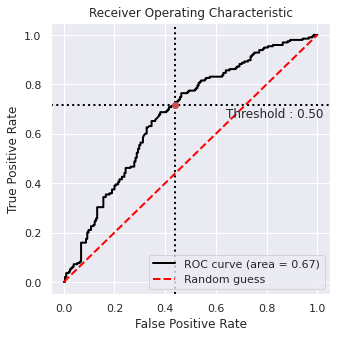

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(Y2["Impactado"], Y2["Probs"], labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

Este ultimo resultado, de ROC puede ser considerado aceptable puesto que es coherente con lo esperado.

<a id='ML'></a>
#### 6. Pruebas con otros modelos

Máquinas de vectores de soporte

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Maquina de Vectores de Soporte


In [ ]:
svc_model = SVC()
svc_model.fit(Xtrain,ytrain)
Y_pred=svc_model.predict(Xtest)
print('Accuracy Maquina de Vectores de Soporte: {}'.format(svc_model.score(Xtrain,ytrain)))

Accuracy Maquina de Vectores de Soporte: 0.6038798498122653


K vecinos mas cercanos

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(Xtrain,ytrain)
Y_pred=kn_model.predict(Xtest)
print('Accuracy Maquina de Vectores de Soporte: {}'.format(kn_model.score(Xtrain,ytrain)))

Accuracy Maquina de Vectores de Soporte: 0.7083854818523154


Arboles de decision

In [ ]:
td_model = DecisionTreeClassifier()
td_model.fit(Xtrain,ytrain)
Y_pred=td_model.predict(Xtest)
print('Accuracy Arboles de Decision: {}'.format(td_model.score(Xtrain,ytrain)))

Accuracy Arboles de Decision: 0.9762202753441802


Como se puede apreciar de los resultado, la exactitud o accuracy de Maquina de soporte de vectores y K vecinos más cercanos son similares a la de Regresion Logistica y por otro lado el algoritmo de Arboles de decicion es mayor a los 3 lo que podria indicar un sobreajuste.

<a id='conclusion'></a>
#### 7. Conclusion

Al principio, interrogamos a fondo los datos para obtener información sobre que características podrían descartarse y cuáles podrían diseñarse de manera valiosa. Elegimos una métrica apropiada y utilizamos un algoritmo ML basado en regresion logistica que funciona mejor predicciones o resultados binarios Además, se realizó la validación a traves de "Validación Cruzada" y agregando un plus de comparación con otros algoritmos frecuentemente utilizados. En general, el método utilizado en este núcleo debería ser ampliamente aplicable a una variedad de tales problemas.


<a href='#top'>volver arriba</a>

<a id="referencias"></a>
#### 8. REFERENCIAS

<a href='https://www.ipe.org.pe/portal/wp-content/uploads/2020/05/INFORME-IPE-7.pdf'>[1]</a>   Informe IPE, Impacto del COVID-19 en la economía peruana, 7° Edición - Mayo 2020.

